In [1]:
import math
import pickle
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from pathlib import Path

warnings.filterwarnings("ignore")

In [2]:
# Apply the default theme
sns.set_theme()

In [3]:
# loading our data.

def load_pickle(path):
    with open(path, "rb") as f:
        return pickle.load(f)

data_files = load_pickle("irish_rain_bundle.pkl")
data_files.keys()

dict_keys(['rain_data_per_month', 'rain_data_per_year', 'all_station_info'])

## Using `rain_data_per_month` file to calculate mean correlation `r` between the stations.

In [4]:
rain_data_per_month = data_files['rain_data_per_month']
rain_data_per_month.keys()

dict_keys(['Cork Airport', 'Killarney', 'Waterford', 'Cappoquinn', 'Dublin Airport', 'Phoenix Park', 'Strokestown', 'Athboy', 'Belfast', 'Enniscorthy', 'Shannon Airport', 'Malin Head', 'Derry', 'Birr', 'Mullingar', 'Valentia', 'Rathdrum', 'Roches Point', 'Markree Castle', 'University College Galway', 'IIP_National series', 'Foulkesmills', 'Armagh', 'Portlaw', 'Ardara', 'Drumsna'])

In [5]:
# deleting national series, as it is not relevant here.

del rain_data_per_month['IIP_National series']

In [6]:
rain_data_per_month['Cork Airport'].keys()

dict_keys(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [7]:
df = pd.DataFrame(rain_data_per_month['Cork Airport'])
df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,155.3,92.6,56.0,207.2,35.3,11.4,179.0,46.5,40.7,53.8,153.2,169.4
1,359.5,47.1,78.8,39.0,56.3,104.7,64.5,57.5,37.2,88.7,20.5,98.6
2,216.2,43.5,84.2,45.7,68.4,145.6,53.0,94.7,53.5,121.9,241.2,209.6
3,191.3,15.0,51.5,93.6,63.2,68.8,90.0,85.3,83.8,252.1,171.9,56.4
4,157.0,16.4,35.9,3.7,97.7,108.7,118.5,47.1,42.8,48.3,23.7,40.3


In [8]:
# Now, converting all of our dictionaries into DataFrames

station_dfs = {}

for station_name, month_dict in rain_data_per_month.items():
    df = pd.DataFrame(month_dict)  # Creates a 161x12 DataFrame
    station_dfs[station_name] = df

In [9]:
station_dfs.keys()

dict_keys(['Cork Airport', 'Killarney', 'Waterford', 'Cappoquinn', 'Dublin Airport', 'Phoenix Park', 'Strokestown', 'Athboy', 'Belfast', 'Enniscorthy', 'Shannon Airport', 'Malin Head', 'Derry', 'Birr', 'Mullingar', 'Valentia', 'Rathdrum', 'Roches Point', 'Markree Castle', 'University College Galway', 'Foulkesmills', 'Armagh', 'Portlaw', 'Ardara', 'Drumsna'])

In [10]:
station_dfs['Cork Airport'].head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,155.3,92.6,56.0,207.2,35.3,11.4,179.0,46.5,40.7,53.8,153.2,169.4
1,359.5,47.1,78.8,39.0,56.3,104.7,64.5,57.5,37.2,88.7,20.5,98.6
2,216.2,43.5,84.2,45.7,68.4,145.6,53.0,94.7,53.5,121.9,241.2,209.6
3,191.3,15.0,51.5,93.6,63.2,68.8,90.0,85.3,83.8,252.1,171.9,56.4
4,157.0,16.4,35.9,3.7,97.7,108.7,118.5,47.1,42.8,48.3,23.7,40.3


In [11]:
flattened_data = {
    name: df.values.flatten()
    for name, df in station_dfs.items()
}

station_names = list(flattened_data.keys())
n = len(station_names)

In [12]:
flattened_data.keys()

dict_keys(['Cork Airport', 'Killarney', 'Waterford', 'Cappoquinn', 'Dublin Airport', 'Phoenix Park', 'Strokestown', 'Athboy', 'Belfast', 'Enniscorthy', 'Shannon Airport', 'Malin Head', 'Derry', 'Birr', 'Mullingar', 'Valentia', 'Rathdrum', 'Roches Point', 'Markree Castle', 'University College Galway', 'Foulkesmills', 'Armagh', 'Portlaw', 'Ardara', 'Drumsna'])

### `df.values.flatten()` flattens the dataframe row by row and it preserves the order of the data. For example, our data is ordered like [Jan_1850, Feb_1850, ..., Dec_1850, Jan_1851, ..., Dec_2010].

In [13]:
len(flattened_data['Cork Airport']), 161*12

(1932, 1932)

### `np.corrcoef(s1, s2)` returns a $2*2$ matrix like 

$
\begin{bmatrix}
1.0 & r \\
r & 1.0
\end{bmatrix}
$

### So, to get the actual coefficient `Pearson r` we used `[1, 0]` and this is same as `[0, 1]`.

In [14]:
np.corrcoef(flattened_data['Cork Airport'], flattened_data['Killarney'])

array([[1.       , 0.8066225],
       [0.8066225, 1.       ]])

In [15]:
corr_matrix = pd.DataFrame(index=station_names, columns=station_names, dtype=float)

for i in range(n):
    for j in range(n):
        s1 = flattened_data[station_names[i]]
        s2 = flattened_data[station_names[j]]
        r = np.corrcoef(s1, s2)[1, 0]
        corr_matrix.iloc[i, j] = r

In [16]:
corr_matrix 

,Cork Airport,Killarney,Waterford,Cappoquinn,Dublin Airport,Phoenix Park,Strokestown,Athboy,Belfast,Enniscorthy,...,Valentia,Rathdrum,Roches Point,Markree Castle,University College Galway,Foulkesmills,Armagh,Portlaw,Ardara,Drumsna
Cork Airport,1.000000,0.806623,0.843032,0.882380,0.588547,0.634345,0.679261,0.647216,0.589960,0.848189,...,0.809986,0.792841,0.912118,0.513298,0.596478,0.839160,0.556957,0.878069,0.485960,0.611318
Killarney,0.806623,1.000000,0.743124,0.788913,0.541851,0.589249,0.768470,0.675096,0.626693,0.773369,...,0.902837,0.727521,0.793163,0.687084,0.723823,0.759314,0.620435,0.774469,0.676799,0.713002
Waterford,0.843032,0.743124,1.000000,0.890871,0.696797,0.725706,0.708416,0.734262,0.666726,0.929190,...,0.772605,0.843495,0.877020,0.547469,0.605173,0.921352,0.636938,0.919176,0.504215,0.651853
Cappoquinn,0.882380,0.788913,0.890871,1.000000,0.682603,0.708539,0.751266,0.746879,0.676165,0.892652,...,0.815292,0.822702,0.897029,0.593676,0.648928,0.894793,0.651346,0.910378,0.547009,0.682500
Dublin Airport,0.588547,0.541851,0.696797,0.682603,1.000000,0.935798,0.692398,0.845130,0.729192,0.734504,...,0.553511,0.769557,0.668770,0.565821,0.570448,0.738627,0.735093,0.668766,0.479567,0.660347
Phoenix Park,0.634345,0.589249,0.725706,0.708539,0.935798,1.000000,0.718822,0.864741,0.752805,0.755419,...,0.592736,0.779504,0.688327,0.593784,0.603503,0.756005,0.760662,0.696766,0.511578,0.686515
Strokestown,0.679261,0.768470,0.708416,0.751266,0.692398,0.718822,1.000000,0.854341,0.795974,0.731154,...,0.755053,0.681169,0.734847,0.861911,0.843058,0.731230,0.829861,0.710664,0.787728,0.951217
Athboy,0.647216,0.675096,0.734262,0.746879,0.845130,0.864741,0.854341,1.000000,0.821356,0.764400,...,0.674246,0.747638,0.722677,0.751740,0.736558,0.772527,0.848991,0.723487,0.664701,0.817813
Belfast,0.589960,0.626693,0.666726,0.676165,0.729192,0.752805,0.795974,0.821356,1.000000,0.691225,...,0.630666,0.688890,0.649303,0.724727,0.682317,0.701395,0.856736,0.646888,0.685268,0.771762
Enniscorthy,0.848189,0.773369,0.929190,0.892652,0.734504,0.755419,0.731154,0.764400,0.691225,1.000000,...,0.789982,0.883011,0.879609,0.579846,0.631795,0.937486,0.665454,0.919281,0.539482,0.671193


In [17]:
# Step 1: Calculate mean, min, and max r for each station (excluding self)
mean_r = corr_matrix.apply(lambda row: row.drop(row.name).mean(), axis=1)
min_r = corr_matrix.apply(lambda row: row.drop(row.name).min(), axis=1)
max_r = corr_matrix.apply(lambda row: row.drop(row.name).max(), axis=1)

# Step 2: Create range as string "min–max"
range_r_str = min_r.round(2).astype(str) + "–" + max_r.round(2).astype(str)

# Step 3: Combine into final table
summary_df = pd.DataFrame({
    'StationName': corr_matrix.index,
    'Mean_r': mean_r.round(2),
    'Range_of_r': range_r_str
})

# Optional: Sort alphabetically or by mean_r
summary_df = summary_df.sort_values('StationName').reset_index(drop=True)


pd.set_option('display.max_rows', None)
display(summary_df)

,StationName,Mean_r,Range_of_r
0,Ardara,0.65,0.48–0.85
1,Armagh,0.72,0.56–0.86
2,Athboy,0.77,0.65–0.92
3,Belfast,0.72,0.59–0.86
4,Birr,0.75,0.64–0.89
5,Cappoquinn,0.74,0.52–0.91
6,Cork Airport,0.69,0.45–0.91
7,Derry,0.70,0.54–0.84
8,Drumsna,0.74,0.61–0.95
9,Dublin Airport,0.67,0.48–0.94


## Interpreting Correlation Values Between Stations

The correlation values we calculated measure **how similar rainfall variability is between stations** over the period 1850–2010. They do not compare absolute rainfall amounts, but instead capture whether stations experience **wet and dry years at the same time**.

- **Mean r**  
  Indicates how strongly a station is related to the overall network.  
  - High mean r → the station moves in sync with others, making it a good candidate for a reference series.  
  - Low mean r → the station behaves differently, possibly due to local climate or data issues.

- **Range of r**  
  Shows the spread between the weakest and strongest correlations of a station with the rest.  
  - Small range → the station correlates fairly consistently with all others.  
  - Large range → the station aligns well with some, but poorly with others (suggesting unique regional features).

**Usefulness**  
These correlations help to:
1. Identify representative stations for homogenization and regional analyses.  
2. Detect outliers that may have quality issues or unique local conditions.  
3. Understand the degree of spatial coherence in rainfall across the network.

---

#### The results in this table differ slightly from those in the related article: https://mural.maynoothuniversity.ie/id/eprint/8729/. In the article, the reference series for each station was identified using the **HOMogenisation softwarE in R (HOMER)**. In contrast, here we calculated the correlation of each station with all others (excluding itself) and then averaged the results.

---
## Now, we'll use the `rain_data_per_year` to calculate z-score for each station per year.

In [18]:
rain_data_per_year = data_files['rain_data_per_year']
rain_data_per_year.keys()

dict_keys(['Cork Airport', 'Killarney', 'Waterford', 'Cappoquinn', 'Dublin Airport', 'Phoenix Park', 'Strokestown', 'Athboy', 'Belfast', 'Enniscorthy', 'Shannon Airport', 'Malin Head', 'Derry', 'Birr', 'Mullingar', 'Valentia', 'Rathdrum', 'Roches Point', 'Markree Castle', 'University College Galway', 'IIP_National series', 'Foulkesmills', 'Armagh', 'Portlaw', 'Ardara', 'Drumsna'])

In [19]:
# deleting national series, as it is not relevant here.

del rain_data_per_year['IIP_National series']

In [20]:
rain_data_per_year['Cork Airport'].keys()

dict_keys(['1850', '1851', '1852', '1853', '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861', '1862', '1863', '1864', '1865', '1866', '1867', '1868', '1869', '1870', '1871', '1872', '1873', '1874', '1875', '1876', '1877', '1878', '1879', '1880', '1881', '1882', '1883', '1884', '1885', '1886', '1887', '1888', '1889', '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898', '1899', '1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973

In [21]:
rain_data_per_year['Cork Airport']['1850'] # per month values

[155.3, 92.6, 56.0, 207.2, 35.3, 11.4, 179.0, 46.5, 40.7, 53.8, 153.2, 169.4]

In [22]:
def zscore(series):
    mu = series.mean()
    sigma = series.std(ddof=1)
    if sigma == 0 or np.isclose(sigma, 0):
        return pd.Series(0.0, index=series.index)
    return (series - mu) / sigma

In [23]:
# Now, calculating z_score for each of the series.

z_score_station_dict = {}

for station_name, year_dict in rain_data_per_year.items():
    rainfall_per_year = [sum(rpm) for _, rpm in year_dict.items()] # total 161 values
    z_score = zscore(np.array(rainfall_per_year))
    z_score_station_dict[station_name] = z_score

z_score_station_dfs = pd.DataFrame(z_score_station_dict) 
z_score_station_dfs.head()

,Cork Airport,Killarney,Waterford,Cappoquinn,Dublin Airport,Phoenix Park,Strokestown,Athboy,Belfast,Enniscorthy,...,Valentia,Rathdrum,Roches Point,Markree Castle,University College Galway,Foulkesmills,Armagh,Portlaw,Ardara,Drumsna
0,0.005128,-0.550543,-0.716904,-0.544993,-0.455906,-0.356431,-0.387564,-0.382149,0.288857,-0.498235,...,-0.631697,-0.503102,-0.497319,-0.655229,-0.185444,-0.613467,-0.456744,-0.798419,-0.499429,-0.193816
1,-0.800278,-0.802397,-0.597825,-0.899216,-0.831585,-0.710457,-0.415516,-0.475353,-0.178638,-0.843678,...,-0.973468,-0.922128,-0.807870,-0.039115,-0.103304,-0.855556,-0.952994,-0.987505,-0.515128,-0.216275
2,0.968894,1.427876,2.169199,1.806960,2.532492,1.955366,1.935796,1.934278,1.060496,1.717143,...,1.807821,1.916273,1.689958,1.029780,1.200331,1.855570,3.031981,1.218104,1.787034,1.848269
3,0.127571,-0.039249,0.399387,0.094018,-0.246100,-0.302819,-0.941512,-0.723328,-1.671354,0.100209,...,0.254836,-0.014793,0.102428,-1.056324,-0.886280,0.074680,-0.450753,-0.006588,-0.929375,-0.697059
4,-2.499793,-1.920062,-1.679691,-1.829582,-1.143605,-1.176329,-0.722135,-0.780619,-0.933941,-1.728640,...,-2.314141,-1.476395,-1.662037,-0.566327,-0.863095,-1.692835,0.156329,-1.465745,-0.824547,-0.508239


In [24]:
def list_extremes(zscore_dict, start_year=1850, threshold=2.0):

    records = []
    for station, z in zscore_dict.items():
        years = np.arange(start_year, start_year + len(z))
        mask = np.abs(z) >= threshold
        for y, val in zip(years[mask], z[mask]):
            records.append((station, int(y), round(float(val), 2)))
    
    df = pd.DataFrame(records, columns=["Station", "Year", "Z"])
    return df.sort_values(["Year", "Station"]).reset_index(drop=True)


extremes_df = list_extremes(z_score_station_dict, start_year=1850, threshold=2.0)
extremes_df.head()

,Station,Year,Z
0,Armagh,1852,3.03
1,Derry,1852,2.11
2,Dublin Airport,1852,2.53
3,Mullingar,1852,2.21
4,Shannon Airport,1852,2.10


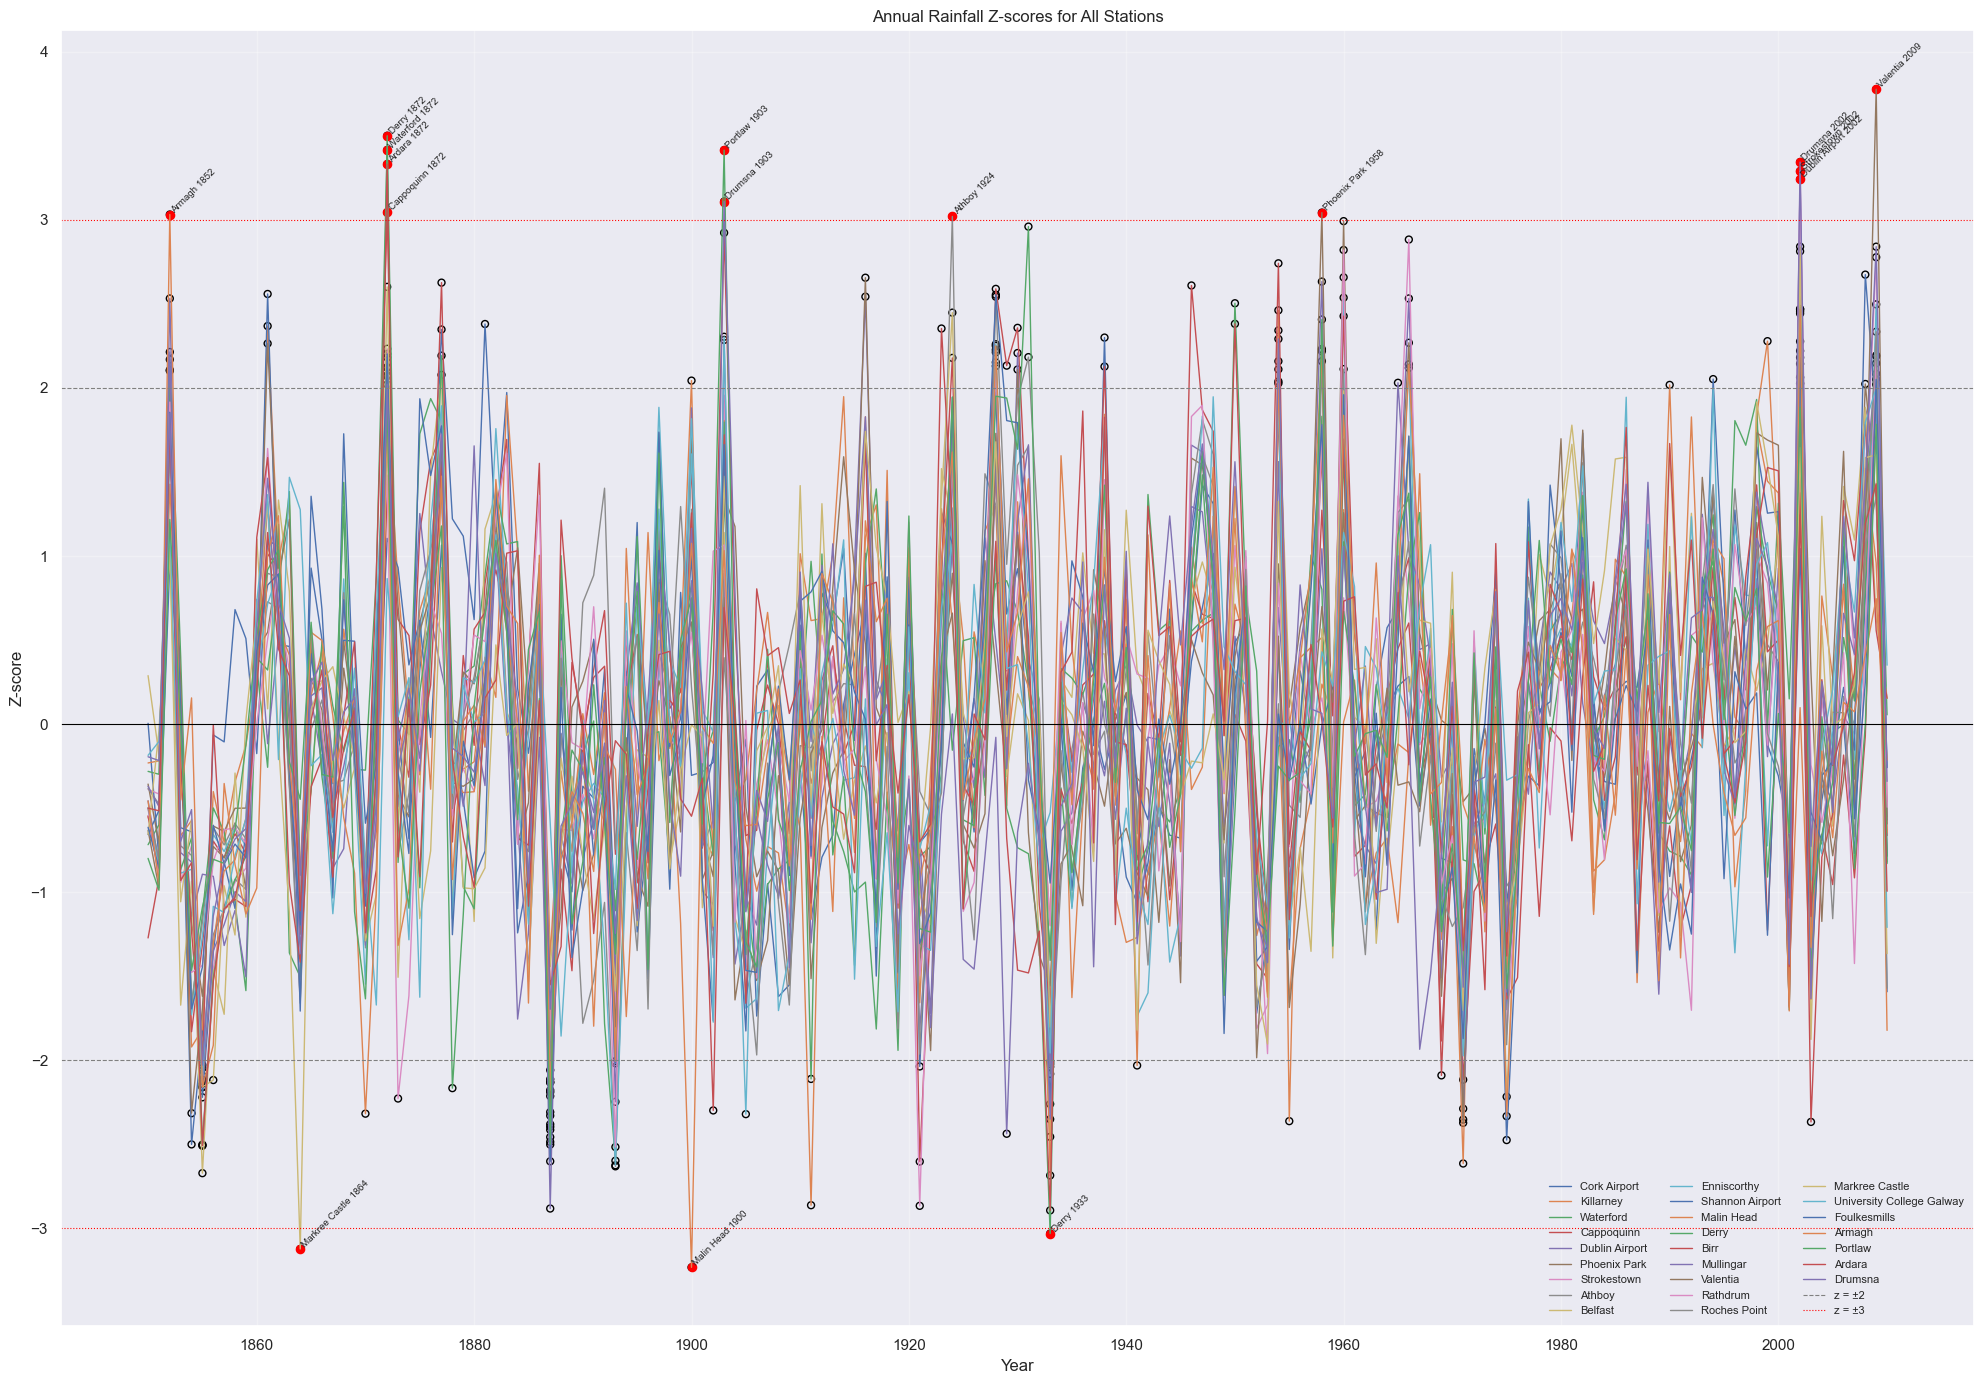

In [25]:
def plot_all_stations_together(zscore_dict, start_year=1850,
                               thr2=2.0, thr3=3.0,
                               figsize=(20,14),
                               annotate=True):
    """
    Plot all stations' z-scores in one plot with threshold lines.
    Highlights and optionally annotates years where |z| >= thr2 or thr3.
    """
    years = np.arange(start_year, start_year + len(next(iter(zscore_dict.values()))))
    
    plt.figure(figsize=figsize)
    
    for station, z in zscore_dict.items():
        plt.plot(years, z, lw=1, label=station)
        
        # Highlight points crossing thresholds
        mask2 = np.abs(z) >= thr2
        mask3 = np.abs(z) >= thr3
        
        plt.scatter(years[mask2], z[mask2], s=25, facecolors="none", edgecolors="black")
        plt.scatter(years[mask3], z[mask3], s=35, color="red")
        
        # Annotate extreme years with station name + year
        if annotate:
            for y, val in zip(years[mask3], z[mask3]):
                plt.text(y, val, f"{station} {y}", fontsize=7,
                         ha="left", va="bottom", rotation=45)
    
    # Add guide lines
    plt.axhline(0, color="black", lw=0.8)
    plt.axhline(thr2, color="gray", ls="--", lw=0.8, label="z = ±2")
    plt.axhline(-thr2, color="gray", ls="--", lw=0.8)
    plt.axhline(thr3, color="red", ls=":", lw=0.8, label="z = ±3")
    plt.axhline(-thr3, color="red", ls=":", lw=0.8)
    
    plt.title("Annual Rainfall Z-scores for All Stations")
    plt.xlabel("Year")
    plt.ylabel("Z-score")
    plt.grid(alpha=0.3)
    plt.legend(ncol=3, fontsize=8, frameon=False)
    plt.tight_layout()
    plt.show()


plot_all_stations_together(z_score_station_dict, start_year=1850)